In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
confusion_matrix, classification_report, f1_score,
accuracy_score, precision_score, recall_score, jaccard_score
)
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv("/home/hadiii/python3/teleCust1000t.csv")
display(df.head(10))
display(df.describe())

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [38]:

df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

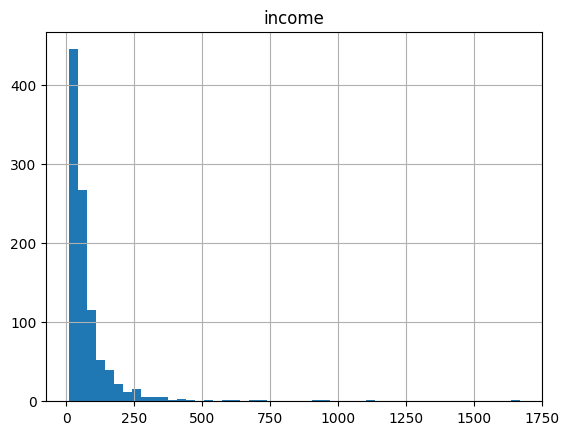

In [39]:
df.hist(column='income', bins=50)
plt.show()

In [40]:
print('\nBasic info:')
print(df.info())
print('\nMissing values per column:')
print(df.isna().sum())
print('\nNumeric description:')
print(df.describe())


Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None

Missing values per column:
region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

Numeric description:
          region       tenure          age      marital      address  \
c

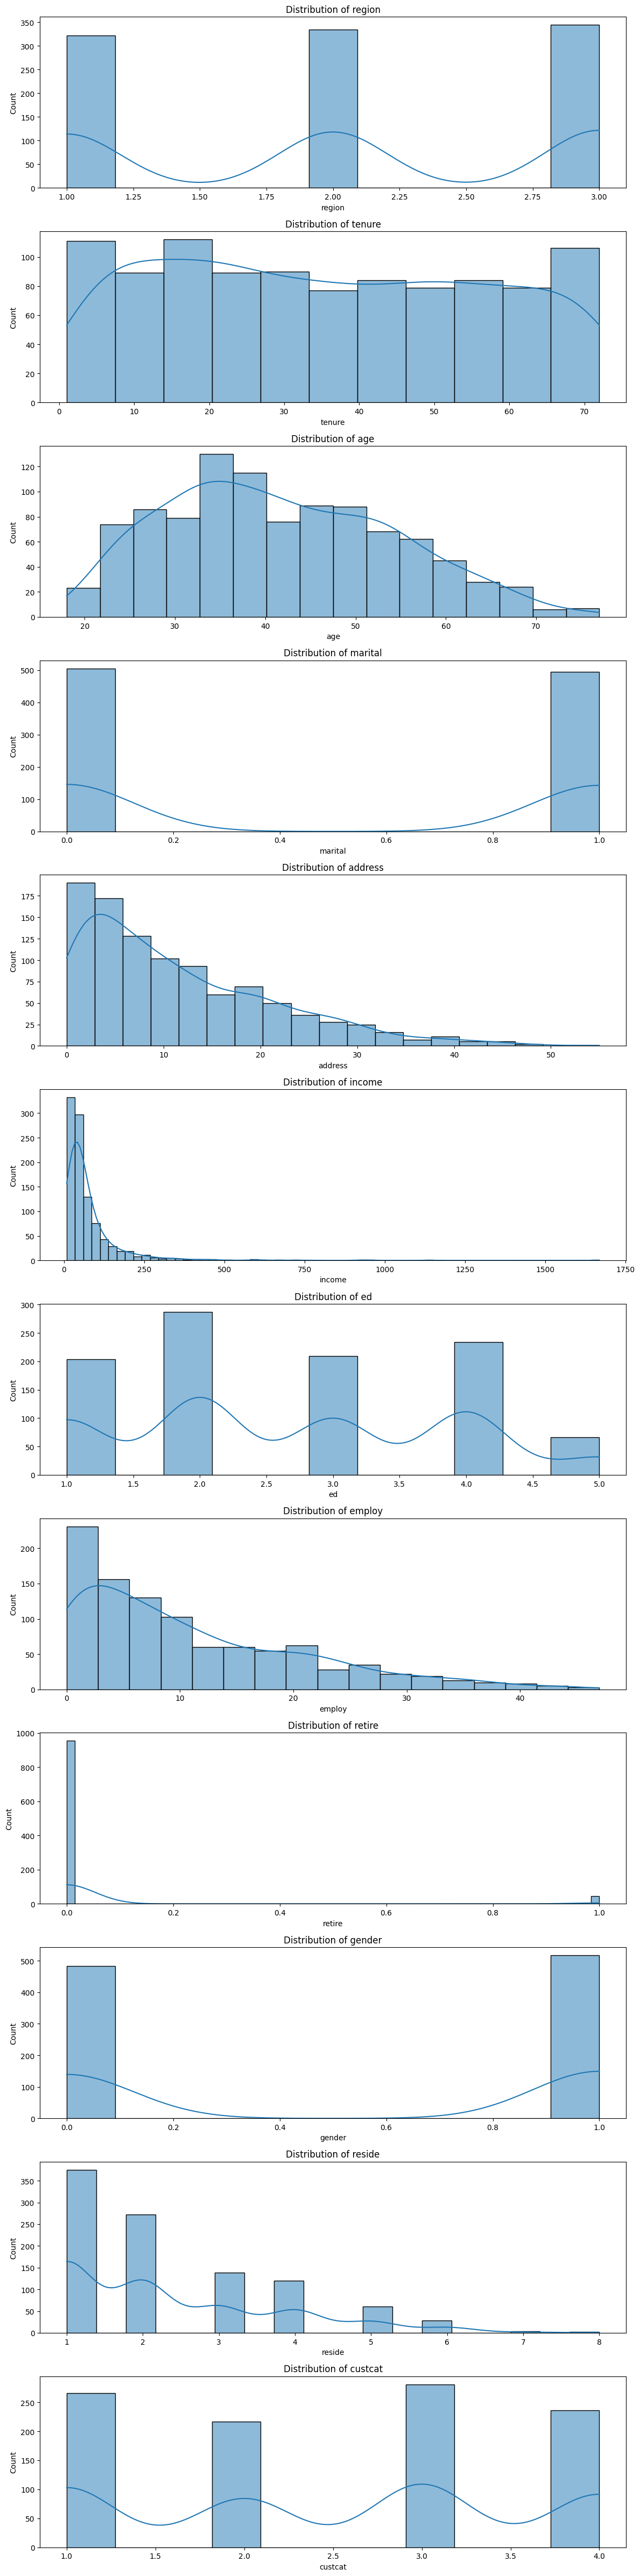

In [41]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) > 0:
  plt.figure(figsize=(12, 4*len(numeric_cols)))
  for i, c in enumerate(numeric_cols, 1):
      plt.subplot(len(numeric_cols), 1, i)
      sns.histplot(df[c].dropna(), kde=True)
      plt.title(f'Distribution of {c}')
  plt.tight_layout()
  plt.show()

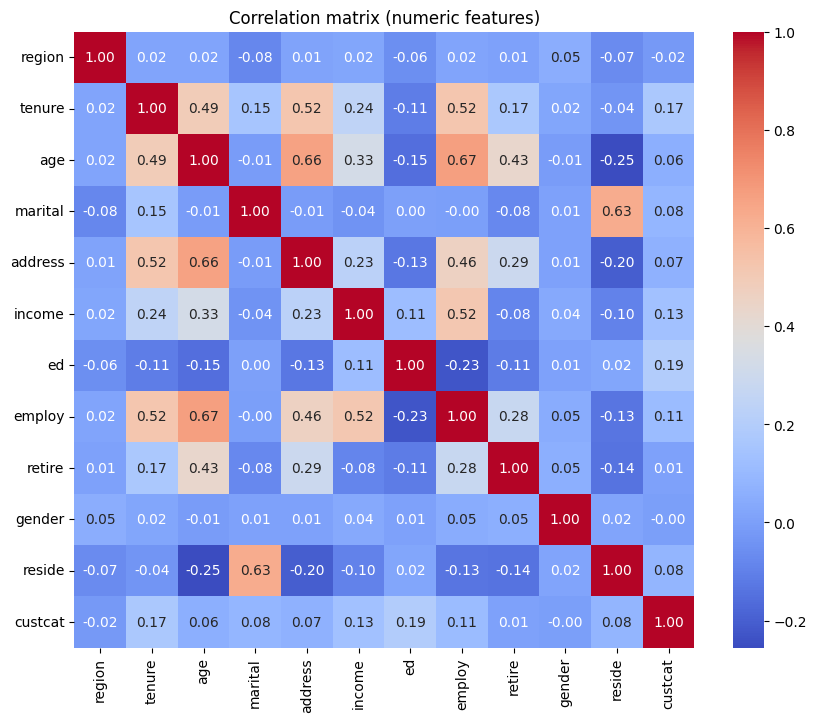

In [42]:
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation matrix (numeric features)')
    plt.show()

In [43]:
for c in df.columns:
    if c == 'custcat':
        continue
    coerced = pd.to_numeric(df[c], errors='coerce')
    non_na = coerced.notna().sum()
    if non_na / len(df) > 0.8:
        df[c] = coerced

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in numeric_cols]
cat_cols.remove('custcat') if 'custcat' in cat_cols else None

print('\nNumeric columns after coercion:', numeric_cols)
print('Categorical columns after coercion:', cat_cols)

for c in numeric_cols:
    if df[c].isna().sum() > 0:
        df[c].fillna(df[c].median(), inplace=True)
for c in cat_cols + (['custcat'] if 'custcat' in df.columns and df['custcat'].dtype==object else []):
    if df[c].isna().sum() > 0:
        df[c].fillna(df[c].mode()[0], inplace=True)


if df['custcat'].dtype == object or df['custcat'].dtype.name == 'category':
    le_target = LabelEncoder()
    df['custcat_enc'] = le_target.fit_transform(df['custcat'])
    target_names = list(le_target.classes_)
else:
    df['custcat_enc'] = df['custcat']
    target_names = sorted(df['custcat'].unique())

print('\nEncoded target classes:', target_names)


Numeric columns after coercion: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
Categorical columns after coercion: []

Encoded target classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [44]:
numeric_features = [c for c in numeric_cols if c != 'custcat']
categorical_features = cat_cols

numeric_features, categorical_features

(['region',
  'tenure',
  'age',
  'marital',
  'address',
  'income',
  'ed',
  'employ',
  'retire',
  'gender',
  'reside'],
 [])

In [45]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [46]:
X = df.drop(columns=['custcat', 'custcat_enc'])
y = df['custcat_enc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (800, 11)
Test shape: (200, 11)


In [47]:
pipe = Pipeline([
    ('preproc', preprocessor),
    ('knn', KNeighborsClassifier())
])

In [48]:
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

In [55]:
print("\nStarting GridSearch for KNN...")
grid.fit(X_train, y_train)

print("\nBest params:", grid.best_params_)
print("Best CV f1_macro:", grid.best_score_)

best_model = grid.best_estimator_


Starting GridSearch for KNN...
Fitting 5 folds for each of 28 candidates, totalling 140 fits



Best params: {'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'uniform'}
Best CV f1_macro: 0.36083874003850097


In [57]:
y_pred = best_model.predict(X_test)

print("\n Classification report (test):")
target_names = [str(t) for t in np.unique(y_test)]
print("\n",classification_report(y_test, y_pred, target_names=target_names))


 Classification report (test):

               precision    recall  f1-score   support

           1       0.35      0.43      0.39        53
           2       0.28      0.25      0.27        44
           3       0.35      0.43      0.39        56
           4       0.30      0.17      0.22        47

    accuracy                           0.33       200
   macro avg       0.32      0.32      0.31       200
weighted avg       0.32      0.33      0.32       200



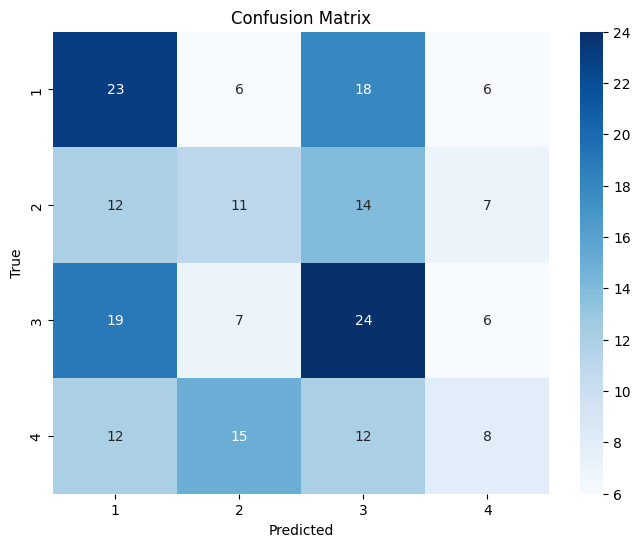

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [53]:
acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
try:
    jaccard_macro = jaccard_score(y_test, y_pred, average='macro')
except Exception:
    classes = np.unique(y_test)
    jacc_per_class = []
    for c in classes:
        jacc = jaccard_score(y_test == c, y_pred == c)
        jacc_per_class.append(jacc)
    jaccard_macro = np.mean(jacc_per_class)

print(f"\nAccuracy: {acc:.4f}")
print(f" F1_macro: {f1_macro:.4f}")
print(f" F1_weighted: {f1_weighted:.4f}")
print(f" Jaccard_macro: {jaccard_macro:.4f}")


Accuracy: 0.3300
 F1_macro: 0.3137
 F1_weighted: 0.3199
 Jaccard_macro: 0.1884
